$$

    f(a) = e^{-\int_0^a{(1+\epsilon(a, s))\mu(s) ds}}\\
    \mu(s) = \mu_{ub} - (\mu_{ub} - \mu_{lb})\frac{s^{m}}{s^{m} + K^{m}}

$$

$$
\epsilon(a, s) = 
\begin{cases}
    0 & \text{if } s < a - t_e \\
    g(a)e^{-\lambda(t_e-(a-s))} & \text{otherwise }
\end{cases}
$$

$$
g(a) = \epsilon_0 e^{-\tau|a-t_e|}
$$

In [1]:
from firm_dynamics.survival_analysis import *
from firm_dynamics.hill import *
from firm_dynamics.one_tail_dip import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = prepare_df()

df_analysis = df.copy()

# Add age column
df_analysis['age'] = ((pd.to_datetime("2023-01-01")) - df_analysis['Entry Date']).dt.days / 365.25

# Add dead column
df_analysis['Dead'] = 1 - df_analysis['status']

# Drop ages > 30
df_analysis = df_analysis[df_analysis['age'] <= 30]

df_analysis.head()

,uen,Sector,status,Exit Date,Entry Date,age,Dead
0,53376145W,N,0,2020-04-30 09:36:00,2018-01-13 10:32:56,4.963723,1
1,53290857X,S,1,NaT,2015-02-26 12:02:44,7.843943,0
3,200412424K,G,1,NaT,2004-09-28 17:56:29,18.255989,0
4,53396472E,H,0,2020-10-10 09:36:00,2019-04-11 21:20:43,3.723477,1
5,48376900B,S,0,1999-12-24 04:48:00,1993-04-12 00:00:00,29.722108,1


In [4]:
sector_list = ['G', 'M', 'F', 'J', 'K', 'C', 'H', 'S', 'N', 'I', 'P', 'L', 'Q', 'R']
parameters = [
    [0.13772780796801345, 0.06040065635354765, 9.678611031814139, 38.28653412450151],
    [0.10853412588782649, 0.060405453614713986, 10.324137068120953, 20.272105749873536],
    [0.08284945935354733, 0.07532165486572806, 7.246079688090822, 99.99992722770091],
    [0.13138896943819373, 0.06387240987874851, 9.026894200245238, 64.59003275843841],
    [0.07012013735407156, 0.011068176577001085, 17.600965883019793, 11.716328585887581],
    [0.09997560159043367, 0.049269924679968866, 8.699286997697827, 100.0],
    [0.19014381450690954, 0.028015942761638372, 6.937678823494837, 100.0],
    [0.14057226596633066, 1e-10, 12.954249620403116, 5.199152676121435],
    [0.12396183075343398, 1e-10, 16.432802053332697, 3.6763982546287552],
    [0.12639621277376695, 1.0000001467199392e-10, 20.851484353072767, 3.8694421065642923],
    [0.12121307544489934, 0.06868412785046317, 9.445279125853938, 100.0],
    [0.07256783090508868, 0.0725678283579821, 14.249169553345428, 0.8209674189944658],
    [0.07830172410553711, 0.04719751513515326, 7.792008550188214, 100.0],
    [0.13228882837926284, 0.08548611352494333, 8.857641818720507, 100.0]
    ]
sector_params_MLE = dict(zip(sector_list, parameters))

def compute_aic_bic(neg_logL, k, n):
    '''
    k = number of params
    n = number of observations
    '''

    aic = 2 * k + 2 * neg_logL
    bic = k * np.log(n) + 2 * neg_logL
    return aic, bic


# Plot perturbed Hill curve with non-perturbed curve for each sector
def plot_perturbed_vs_original(sector, result):
    mu_ub, mu_lb, t_e, hill_k, a, b, c, d = result.x
    sf, ages = obtain_survival_fractions(df_analysis, 'Sector', sector)
    perturbed_survival = survival_hill_with_perturbation(ages, mu_ub, mu_lb, t_e, hill_k, a, b, c, d)
    original_survival = model_survival_curve_hill(ages, sector_params_MLE[sector][0], sector_params_MLE[sector][1], sector_params_MLE[sector][2], sector_params_MLE[sector][3])

    plt.figure(figsize=(10, 6))
    plt.plot(ages, sf, 'o', markersize = 3, label='Observed survival fractions')
    plt.plot(ages, perturbed_survival, label='Perturbed Hill', color='blue')
    plt.plot(ages, original_survival, label='Original Hill', color='orange', linestyle='--')
    plt.title(f'Sector {sector}: Perturbed vs Original Hill Survival Curves')
    plt.xlabel('Age (years)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.grid()
    plt.show()

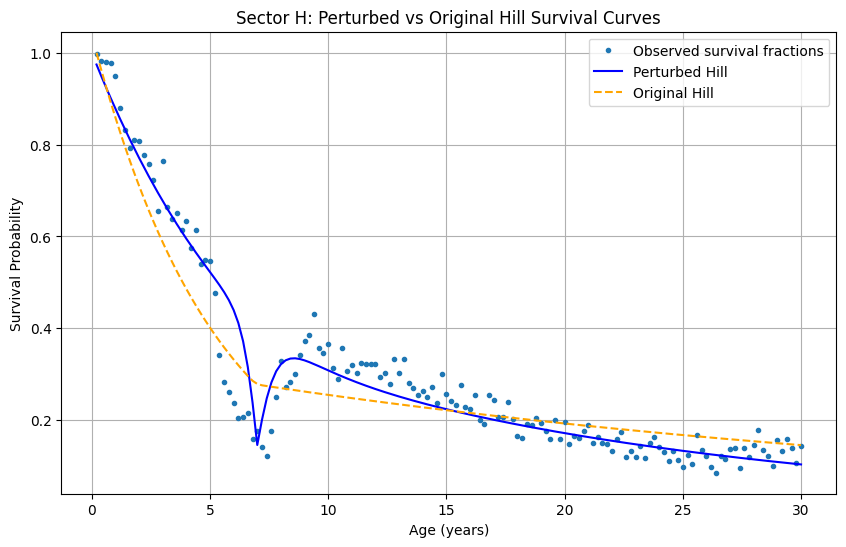

In [18]:
for sector in ['H']:
    mu_ub, mu_lb, t_e, hill_k, a, b, c, d = 0.13, 0.05, 9, 5, 8, 2, 1, 7
    sf, ages = obtain_survival_fractions(df_analysis, 'Sector', sector)
    perturbed_survival = survival_hill_with_perturbation(ages, mu_ub, mu_lb, t_e, hill_k, a, b, c, d)
    original_survival = model_survival_curve_hill(ages, sector_params_MLE[sector][0], sector_params_MLE[sector][1], sector_params_MLE[sector][2], sector_params_MLE[sector][3])

    plt.figure(figsize=(10, 6))
    plt.plot(ages, sf, 'o', markersize = 3, label='Observed survival fractions')
    plt.plot(ages, perturbed_survival, label='Perturbed Hill', color='blue')
    plt.plot(ages, original_survival, label='Original Hill', color='orange', linestyle='--')
    plt.title(f'Sector {sector}: Perturbed vs Original Hill Survival Curves')
    plt.xlabel('Age (years)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.grid()
    plt.show()

--- Sector H ---


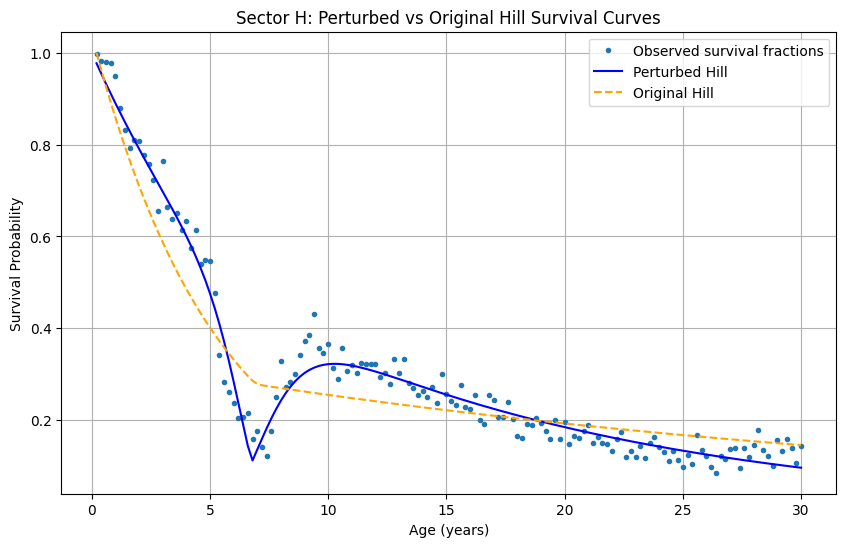

Optimisation success: True
Optimised parameters: [ 0.11602309  0.065069    7.54463089 14.08421503  5.          0.81884716
  0.36840592  6.7672665 ]
Negative log-likelihood: 41763.193726282414


In [20]:
for sector in ['H']:
    print(f'--- Sector {sector} ---')
    result = mle_sector_perturbed(sector, df_analysis, initial_guess=[0.13, 0.07, 10, 5, 9, 2, 1, 8])

    # Plot
    plot_perturbed_vs_original(sector, result)

    print(f"Optimisation success: {result.success}"
          f"\nOptimised parameters: {result.x}"
          f"\nNegative log-likelihood: {result.fun}")

--- Sector G ---


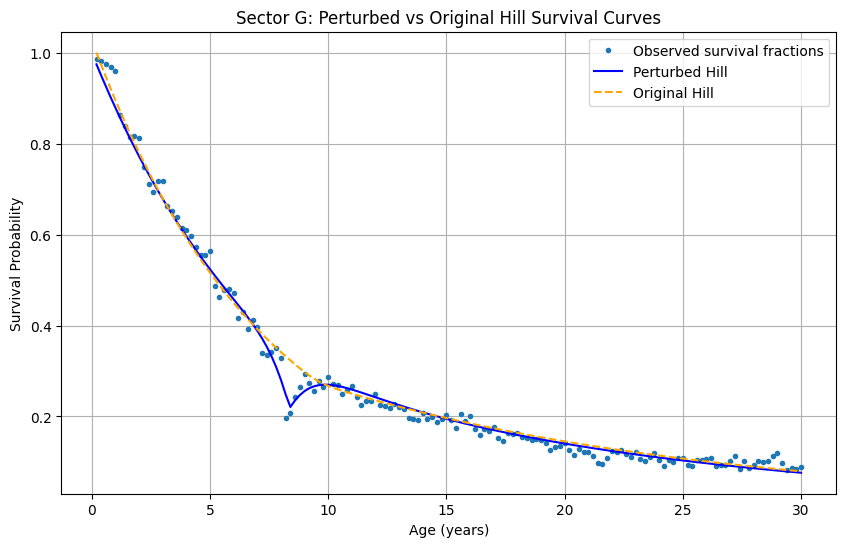

Optimisation success: True
Optimised parameters: [ 0.1292556   0.05986695 10.49703106  4.94013205  2.06657376  1.05424767
  0.56441284  8.36736601]
Negative log-likelihood: 197802.18223603623
AIC: -395588.36447207246, BIC: -395501.02010017575
Original Hill AIC: 397410.3045923492, BIC: 397453.97677829757
--- Sector M ---


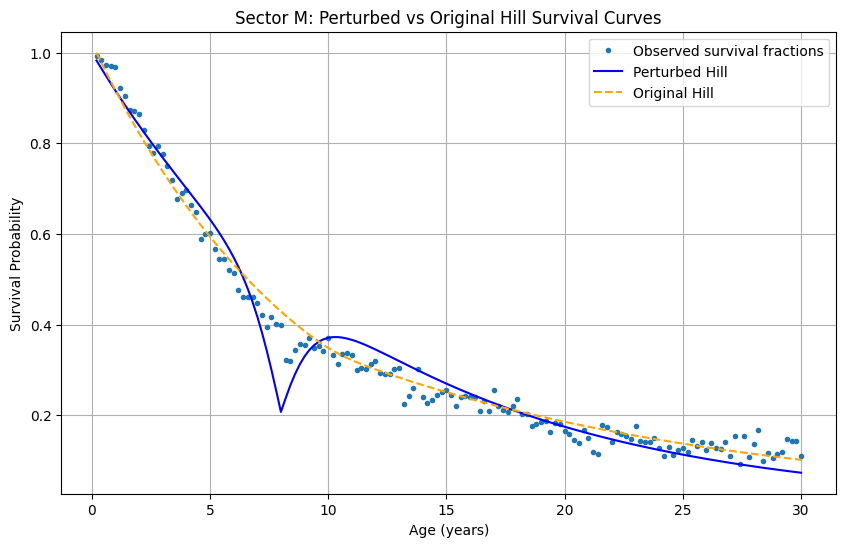

Optimisation success: True
Optimised parameters: [0.08740559 0.08722892 9.99576258 4.99776518 1.99639845 1.00367047
 0.12620873 8.00328142]
Negative log-likelihood: 107368.83805797878
AIC: -214721.67611595755, BIC: -214640.15067771016
Original Hill AIC: 213914.0077583928, BIC: 213954.7704775165
--- Sector F ---


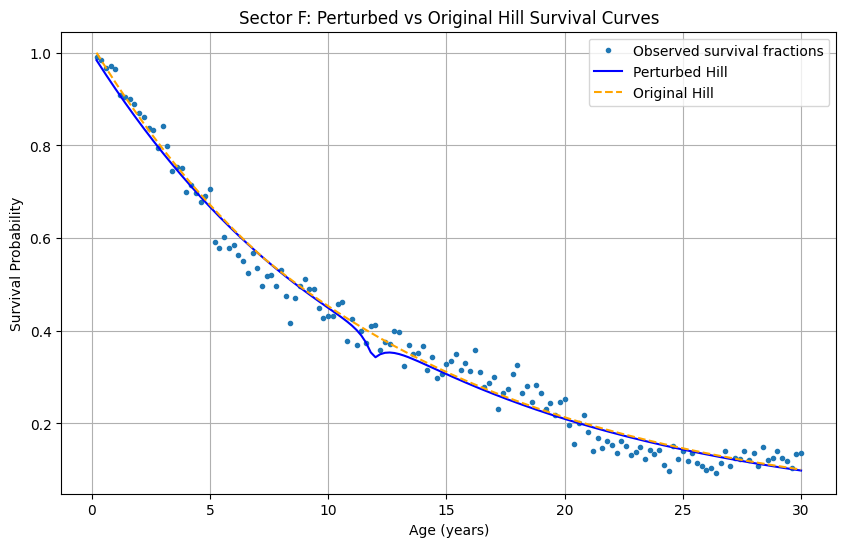

Optimisation success: True
Optimised parameters: [ 0.08104823  0.07562377  8.2411283   4.12930329  1.64450756  1.71074206
  0.97088957 11.90882667]
Negative log-likelihood: 47800.223352237306
AIC: -95584.44670447461, BIC: -95509.11045555804
Original Hill AIC: 95722.60206388419, BIC: 95760.27018834247
--- Sector J ---


c:\Users\chong\OneDrive\Documents\GitHub\a-star\a-star\firm_dynamics\one_tail_dip.py:64: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, _ = quad(integrand, 0.0, a)


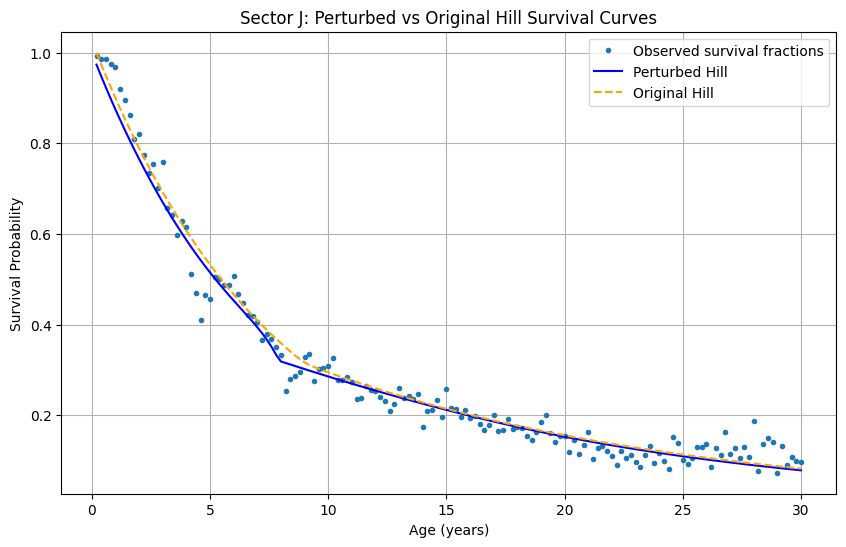

Optimisation success: True
Optimised parameters: [0.13359943 0.06658846 7.69810377 5.12120839 1.44715884 0.30597459
 1.32991855 7.93107336]
Negative log-likelihood: 56970.94396943947
AIC: -113925.88793887894, BIC: -113849.03945444929
Original Hill AIC: 114038.14538999608, BIC: 114076.5696322109
--- Sector K ---


In [ ]:
# test_list = ['G', 'H', 'S', 'J', 'M', 'I']
aic_dip_list = []
aic_original_list = []
bic_dip_list = []
bic_original_list = []

for sector in sector_list:
    print(f'--- Sector {sector} ---')
    result = mle_sector_perturbed(sector, df_analysis, initial_guess=[0.12, 0.04, 10, 5, 2, 1, 0.1, 8])

    # Plot
    plot_perturbed_vs_original(sector, result)

    # Print results
    print(f"Optimisation success: {result.success}")
    print(f"Optimised parameters: {result.x}")
    print(f"Negative log-likelihood: {result.fun}")

    aic, bic = compute_aic_bic(result.fun, k=8, n=len(df_analysis[df_analysis['Sector'] == sector]))
    aic_dip_list.append(aic)
    bic_dip_list.append(bic)
    print(f"AIC: {aic}, BIC: {bic}")

    # Compute AIC/BIC for original Hill model
    sf, ages = obtain_survival_fractions(df_analysis, 'Sector', sector)
    totals, survivors = obtain_total_alive_count(df_analysis, 'Sector', sector)
    original_neg_logL = neg_log_likelihood_hill(sector_params_MLE[sector], ages, survivors, totals)
    aic_original, bic_original = compute_aic_bic(original_neg_logL, k=4, n=len(df_analysis[df_analysis['Sector'] == sector]))
    aic_original_list.append(aic_original)
    bic_original_list.append(bic_original)
    print(f"Original Hill AIC: {aic_original}, BIC: {bic_original}")

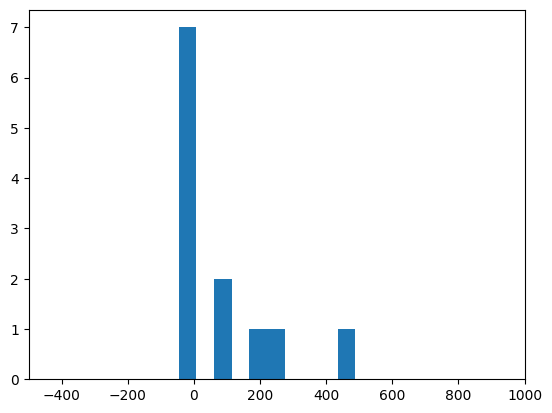

   Sector     AIC diff     BIC diff
0       G  1168.670649  1088.500485
1       M   567.263168   487.093003
2       F    52.818825   -27.351340
3       J   336.311770   256.141606
4       K    82.117731     1.947566
5       C    82.425739     2.255575
6       H  2705.445581  2625.275416
7       S   156.354011    76.183846
8       N   250.751165   170.581000
9       I    49.660317   -30.509848
10      P   153.535907    73.365742
11      L    33.542720   -46.627445
12      Q    51.762608   -28.407556
13      R    48.343509   -31.826656


In [41]:
diff_list = np.array(bic_original_list)-np.array(bic_dip_list)
plt.hist(diff_list, bins=50, label='BIC difference')
plt.xlim(-500, 1000)
plt.show()

table = pd.DataFrame({
    'Sector': sector_list,
    'AIC diff': np.array(aic_original_list) - np.array(aic_dip_list),
    'BIC diff': np.array(bic_original_list) - np.array(bic_dip_list)
})
print(table)

# J v.s. K
# S is the cut-off, exception of K

C:\Users\chong\AppData\Local\Temp\ipykernel_13324\3440803057.py:23: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  val, _ = quad(lambda s: hill_hazard(s, mu_ub, mu_lb, K, m) * epsilon(s, a, eps0, tau, lam, t_e), 0, a)


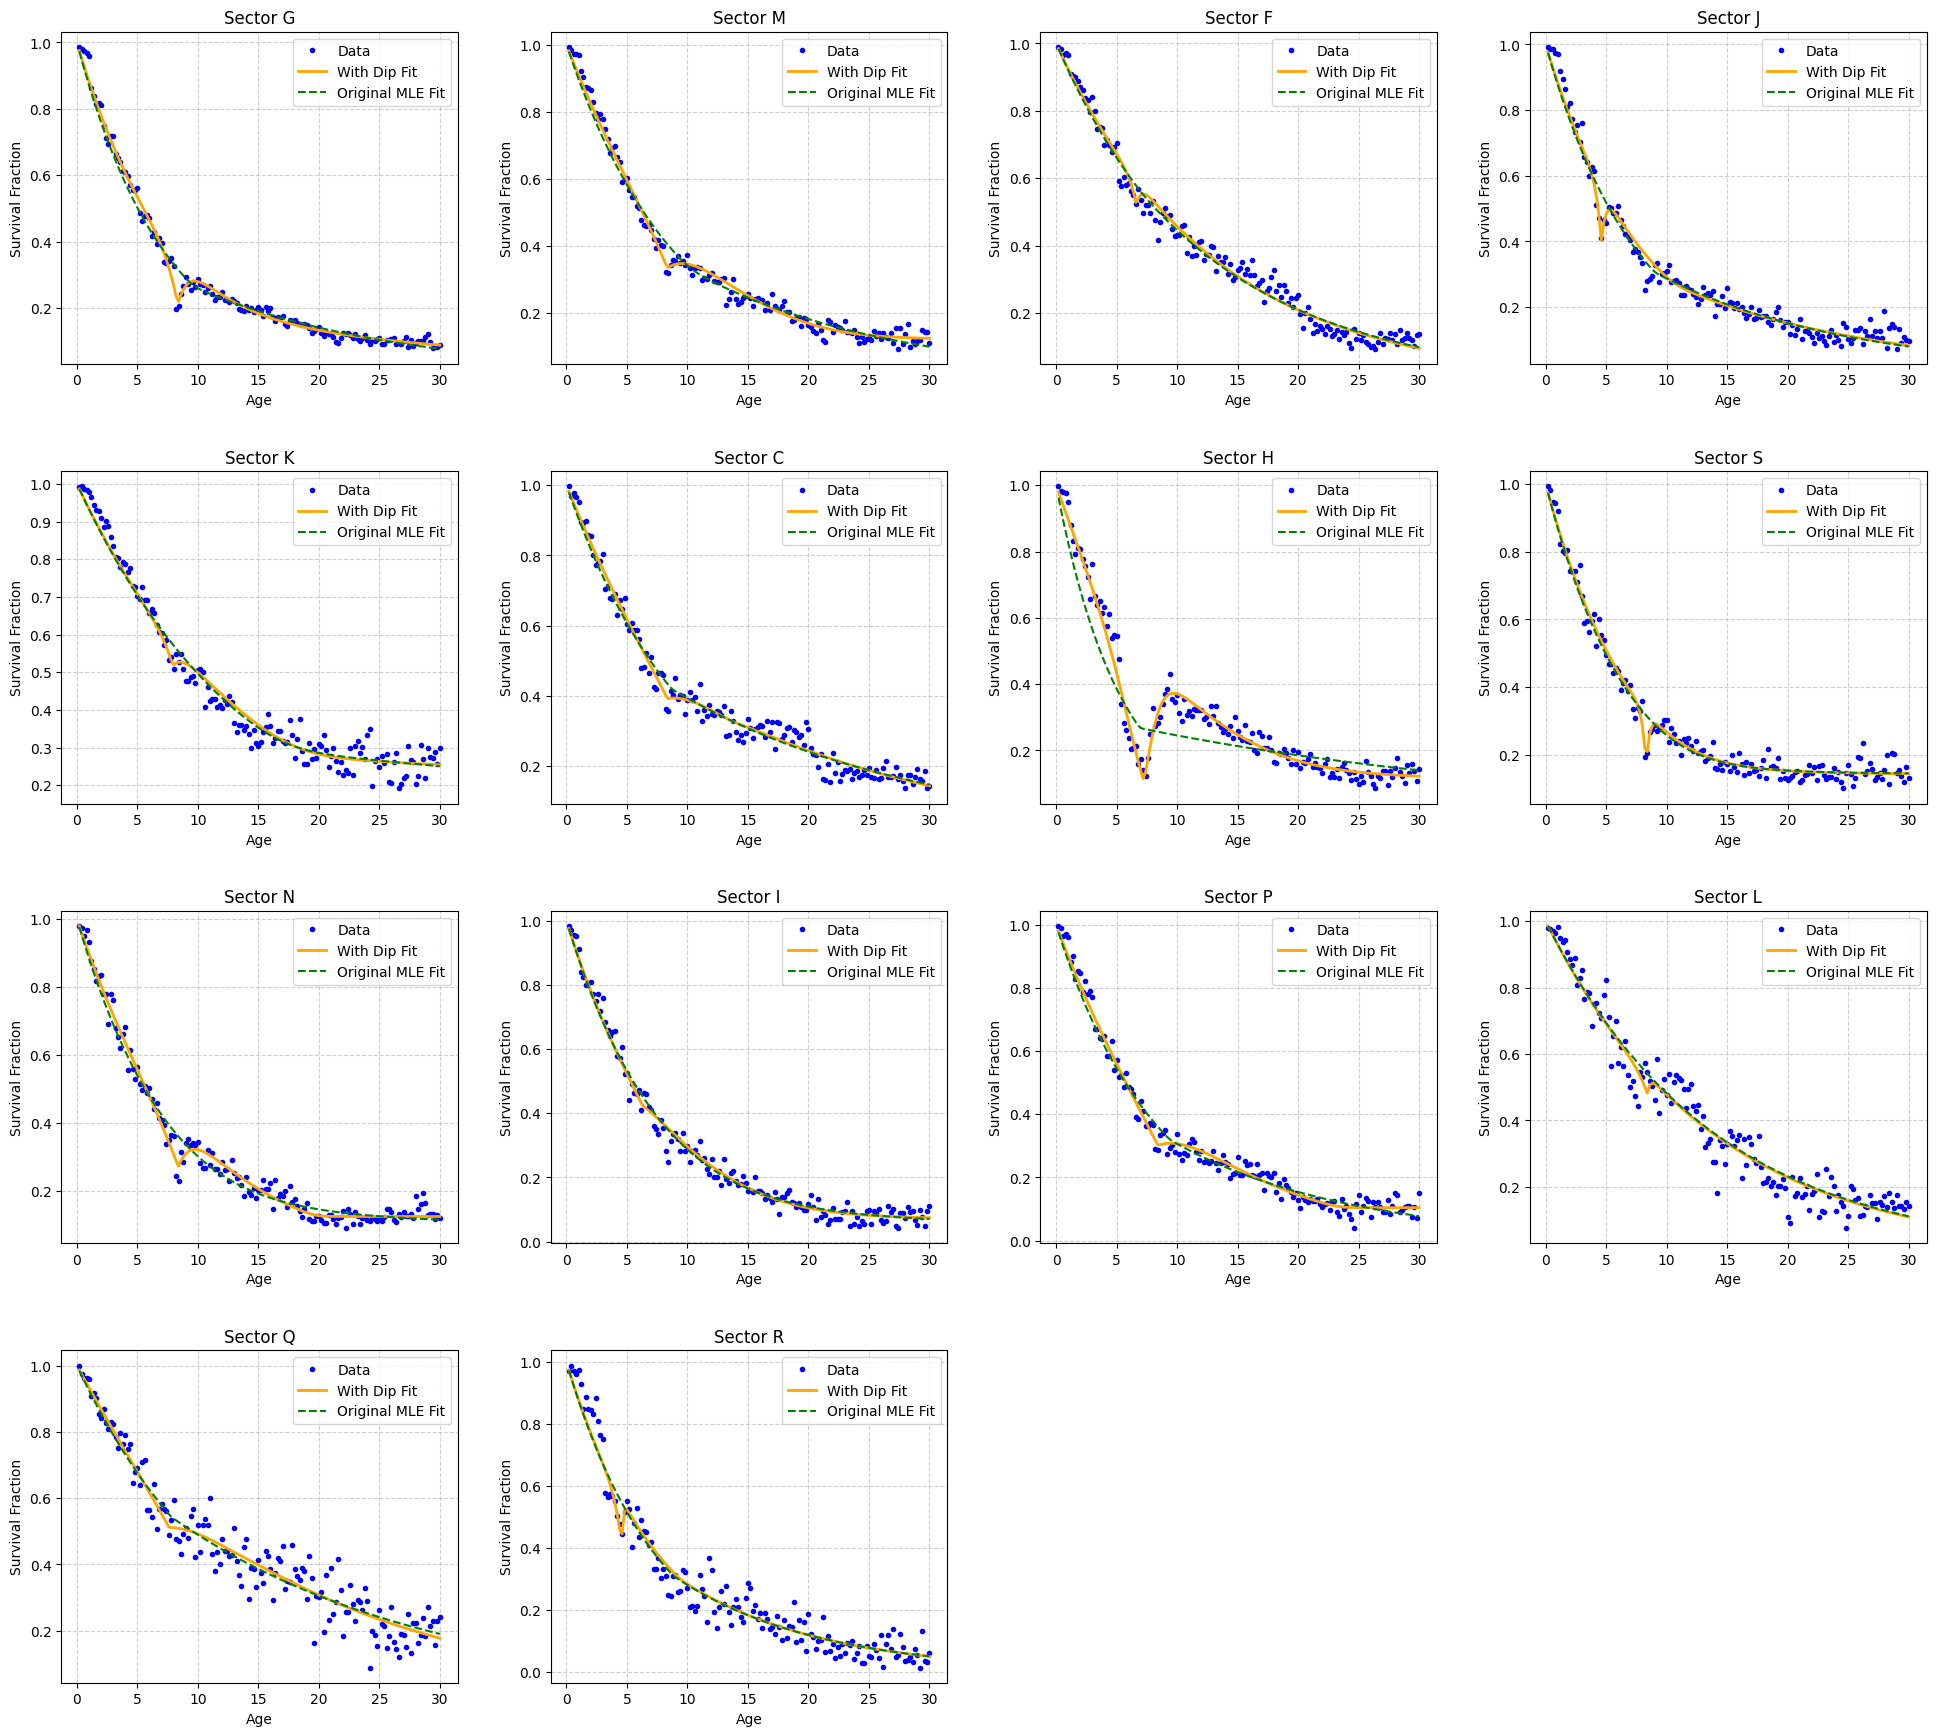

In [43]:
def plot_sectors(df_analysis, sector_params_MLE, all_sectors):
    """
    Calculates and plots the survival curve fits for all specified sectors 
    on a single figure with multiple subplots.

    Args:
        df_analysis: The DataFrame containing the survival data.
        sector_params_MLE: A dictionary containing the original MLE parameters for each sector.
        all_sectors: A list of all sector identifiers to be plotted.
    """
    # Create a grid of subplots. A 4x4 grid is suitable for 14 sectors.
    fig, axes = plt.subplots(4, 4, figsize=(20, 18))
    # Flatten the 2D array of axes to make it easier to iterate over
    axes = axes.flatten()

    for i, sector in enumerate(all_sectors):
        ax = axes[i] # Get the current subplot axis

        try:
            # --- Data Extraction and Model Fitting (from your original function) ---
            survival_fractions, ages = obtain_survival_fractions(df_analysis, 'Sector', sector)
            totals, survivors = obtain_total_alive_count(df_analysis, 'Sector', sector)

            # Define initial guess for the optimization
            initial_guess = [0.1, 0.03, 10, 5, find_dip(df_analysis, sector), 3, 1, 1]

            # Perform the MLE fit for the model with a dip
            result = mlefit_hill_with_dip(ages, survivors, totals, initial_guess)
            mu_ub, mu_lb, K, m, t_e, eps0, tau, lam = result.x

            # --- Plotting on the Subplot ---
            # Plot the raw survival data points
            ax.plot(ages, survival_fractions, 'o', markersize=3, label='Data', color='blue')
            
            # Plot the fitted model with the dip
            ax.plot(ages, model_hill_with_dip(ages, mu_ub, mu_lb, K, m, t_e, eps0, tau, lam), 
                    label='With Dip Fit', color='orange', linewidth=2)
            
            # Plot the original MLE fit without the dip
            ax.plot(ages, model_survival_curve_hill(ages, *sector_params_MLE[sector]), 
                    '--', label='Original MLE Fit', color='green')
            
            ax.set_title(f'Sector {sector}')
            ax.set_xlabel('Age')
            ax.set_ylabel('Survival Fraction')
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.6)

        except Exception as e:
            # If fitting or plotting fails for a sector, print an error and leave the subplot blank
            print(f"Could not process Sector {sector}: {e}")
            ax.set_title(f'Sector {sector} - Error')
            ax.text(0.5, 0.5, 'Fit Failed', horizontalalignment='center', verticalalignment='center')


    # --- Figure Cleanup ---
    # Hide any unused subplots if the number of sectors is not a perfect square
    for j in range(len(all_sectors), len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent titles and labels from overlapping
    plt.tight_layout(pad=3.0)
    
    # Show the final combined plot
    plt.show()

plot_sectors(df_analysis, sector_params_MLE, sector_list)